## Observable Trends

1.	The first third of the graph has a positive trend as the latitude increases so does the temperature. Approximately two thirds of the data show as the latitude increase the max temperature decreases, showing the further away from the equator the max temperature decreases. 
2.	There is almost no correlation between latitude and humidity as well as latitude and cloudiness. This shows that no matter how many clouds are outside it doesn’t change the percentage of humidity.
3.	There is no correlation between latitude and wind speed. 


    

In [38]:
#Dependencies and setup

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

## Generate Cites List from Lats and Longs

In [43]:

#Randomly generate a list of 500 cities. Use 50 to test for duplicates.
for x in range(500):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [44]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")

for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")
    

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1
        
     

Beginning Data Retrieval


C:\Users\alway\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\alway\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\alway\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\alway\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\alway\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\alway\Anaconda3\lib\s

------------------------
Proceesing: City #  1  |  Sri Aman MY
http://api.openweathermap.org/data/2.5/weather?appid=101e19062f0a772e561dde2483ea802d&units=IMPERIAL&q=sri+aman
City not found, skipping...
------------------------
Proceesing: City #  2  |  Senanga ZM
http://api.openweathermap.org/data/2.5/weather?appid=101e19062f0a772e561dde2483ea802d&units=IMPERIAL&q=senanga
City not found, skipping...
------------------------
Proceesing: City #  3  |  Rudnogorsk RU
http://api.openweathermap.org/data/2.5/weather?appid=101e19062f0a772e561dde2483ea802d&units=IMPERIAL&q=rudnogorsk
------------------------
Proceesing: City #  4  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=101e19062f0a772e561dde2483ea802d&units=IMPERIAL&q=tasiilaq
------------------------
Proceesing: City #  5  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?appid=101e19062f0a772e561dde2483ea802d&units=IMPERIAL&q=rikitea
City not found, skipping...
------------------------
Proceesing: City

In [45]:
clean_cities_df.count()

City                707
Country             707
Temperature (F)     707
Latitude            707
Longitude           707
Humidity (%)        707
Cloudiness (%)      707
Wind Speed (mph)    707
dtype: int64

In [46]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Sri Aman,MY,86,1.24,111.46,79,75,3.36
1,Senanga,ZM,65.43,-16.1,23.3,97,80,5.28
2,Rudnogorsk,RU,30.6,57.27,103.75,78,56,8.3
3,Tasiilaq,GL,32,65.61,-37.64,91,92,19.46
4,Rikitea,PF,77.22,-23.12,-134.97,100,8,5.73
5,Albany,US,53.47,42.65,-73.75,50,1,9.17
6,Adrar,DZ,60.8,27.87,-0.29,23,0,11.41
7,Charters Towers,AU,78.93,-20.07,146.27,76,0,10.09
8,Mackay,CA,45.5,53.65,-115.58,39,75,6.93
9,Saint-Georges,CA,30.99,46.12,-70.67,84,68,4.83


In [47]:
# Save data to a CSV file
clean_cities_df.to_csv("worldcities")

## Latitude vs. Temperature

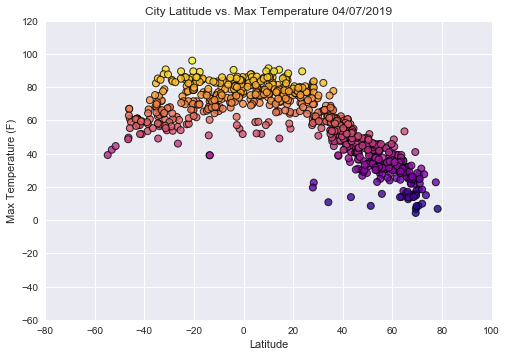

In [48]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

#import current date and time
import datetime
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("worldcities(Latitude_Temperature)")

# Show plot
plt.show()

## Latitude vs. Humidity (%)

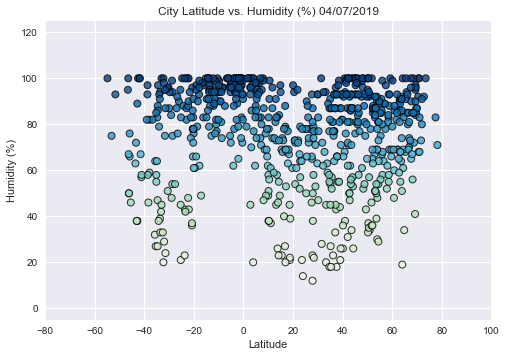

In [49]:

#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

#import current date and time
import datetime
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("worldcities(Latitude_Humidity)")

# Show plot
plt.show()

## Latitude vs. Cloudiness (%)

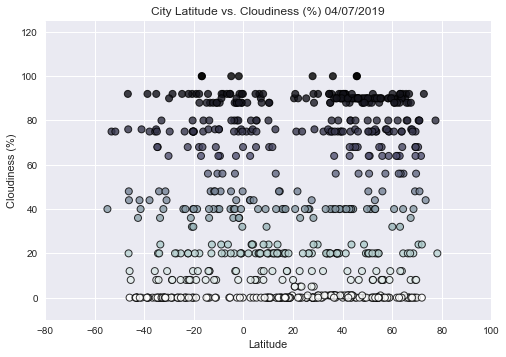

In [50]:

#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

#import current date and time
import datetime
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("worldcities(Latitude_Cloudiness)")

# Show plot
plt.show()

## Latitude vs. Wind Speed (mph)

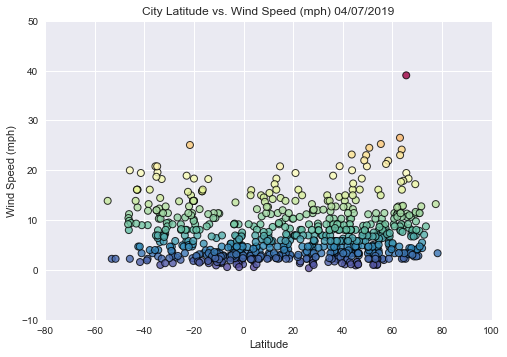

In [51]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

#import current date and time
import datetime
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("worldcities(Latitude_WindSpeed)")

# Show plot
plt.show()

## Latitude vs. Longitude

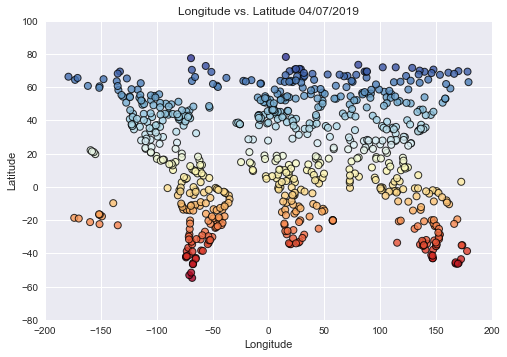

In [52]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Longitude"], 
            clean_cities_df["Latitude"], c=clean_cities_df["Latitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='RdYlBu', alpha=0.8, label="City")

#import current date and time
import datetime
now = datetime.datetime.now()

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"Longitude vs. Latitude {datetime.datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])

# Save the figure
plt.savefig("worldcities(Latitude_Longitude)")

# Show plot
plt.show()